<a href="https://colab.research.google.com/github/github876545678/github876545678/blob/main/Ses_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [56]:
audio_path = '/content/mixkit-playground-with-kids-playing-2266.wav'
audio_path

'/content/mixkit-playground-with-kids-playing-2266.wav'

In [57]:
y,sr = librosa.load(audio_path, sr=None)

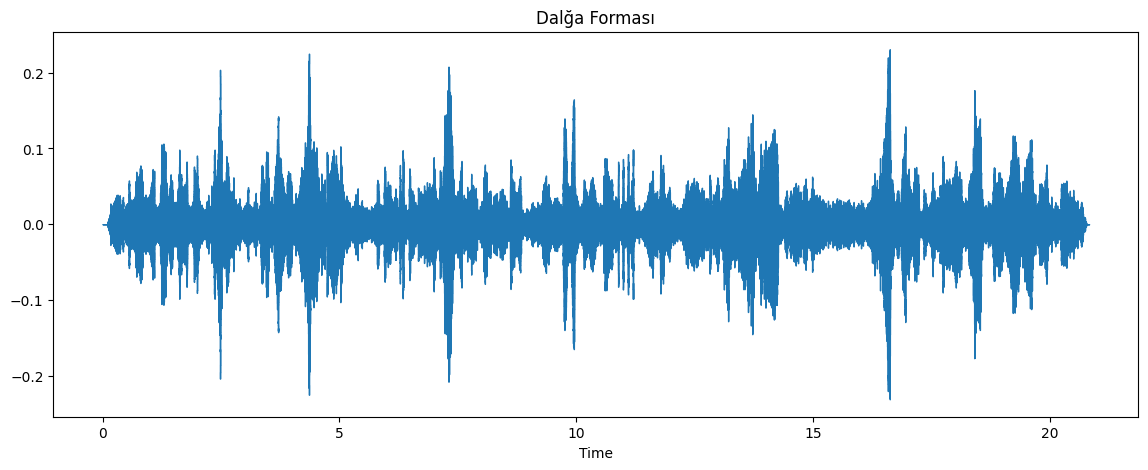

In [58]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)
plt.title('Dalğa Forması')
plt.show()

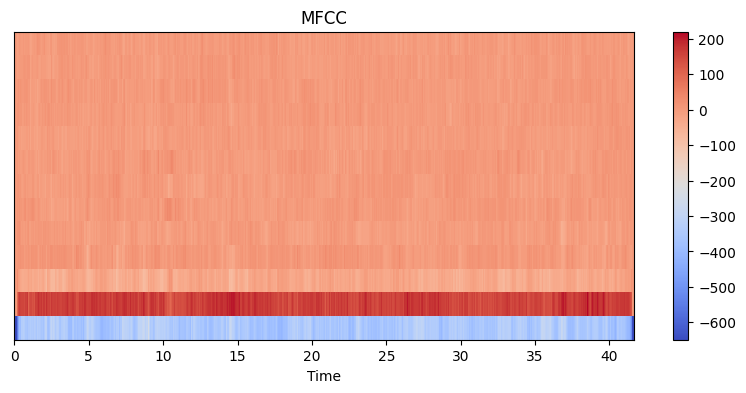

In [59]:
mfccs = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs,x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


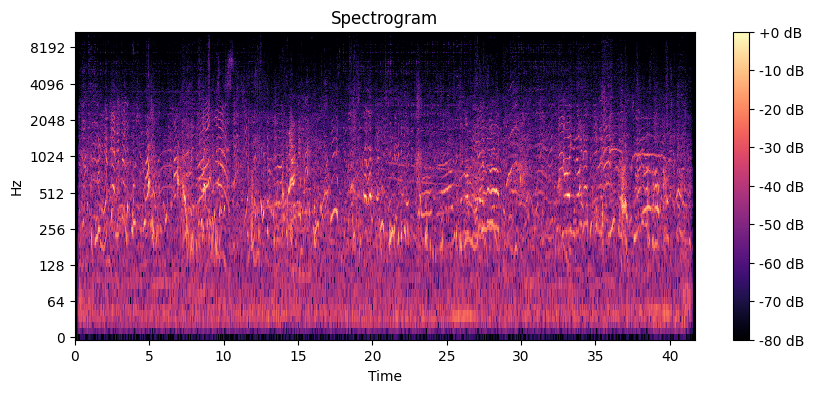

In [60]:
S = np.abs(librosa.stft(y))
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

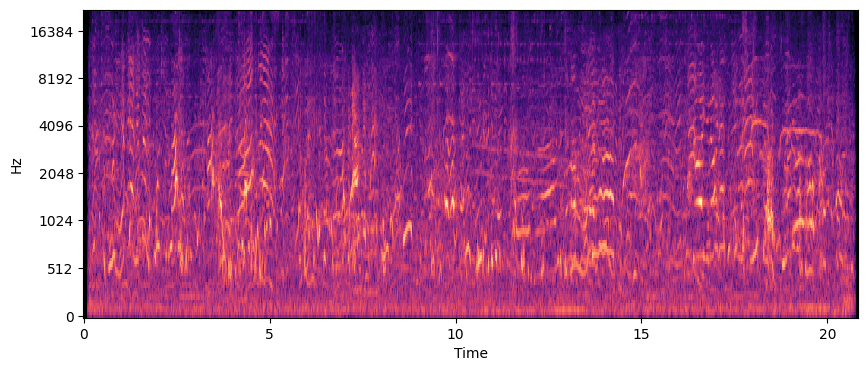

In [61]:
mel_specht = librosa.feature.melspectrogram(y=y,sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(mel_specht,ref=np.max),sr= sr, y_axis='mel',x_axis='time')
plt.colorbar

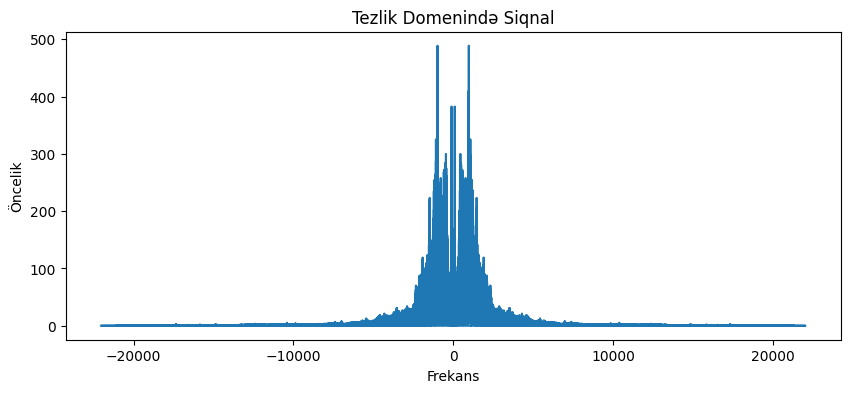

In [62]:
fft_result= np.fft.fft(y)
fft_frequencies =  np.fft.fftfreq(len(y),1/sr)
plt.figure(figsize=(10,4))
plt.plot(fft_frequencies,np.abs(fft_result))
plt.title('Tezlik Domenində Siqnal')
plt.xlabel('Frekans')
plt.ylabel('Öncelik')
plt.show()




In [63]:
import librosa
import numpy as np
import os

# Fayl yolunun təyin edilməsi
audio_path = "/content/mixkit-playground-with-kids-playing-2266.wav"

# Faylın mövcudluğunu yoxlayın
if not os.path.exists(audio_path):
    print("Error: File not found!")
else:
    # Audio xüsusiyyətlərini çıxarma funksiyası
    def extract_features(file_path):
        try:
            audio_data, sample_rate = librosa.load(file_path, sr=None)
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
            return np.mean(mfccs.T, axis=0)
        except Exception as e:
            print(f"Error loading audio file: {e}")
            return None

    # Xüsusiyyətləri çıxarma
    features = extract_features(audio_path)
    if features is not None:
        # Etiket təyin edilməsi
        label = "kids_playing"

        # Məlumat dəstləri
        X = [features]
        y = [label]

        # Təlim və test dəstləri
        if len(X) > 1:  # Bir nümunə varsa, bölünmə edilməyəcək
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        else:
            X_train, y_train = X, y
            X_test, y_test = [], []

        # Nəticələrin çapı
        print("Train X:", X_train)
        print("Train y:", y_train)
        print("Test X:", X_test)
        print("Test y:", y_test)


Train X: [array([-3.5489417e+02,  1.5995790e+02, -3.1623373e+01,  3.4850049e+00,
       -5.0416393e+00,  4.1801706e-01, -1.1451334e+00,  4.6967122e-01,
       -3.5461650e+00,  3.5742751e-01,  1.7640855e+00, -5.2813787e-02,
       -8.8302523e-01], dtype=float32)]
Train y: ['kids_playing']
Test X: []
Test y: []


ZCR Xüsusiyyətləri


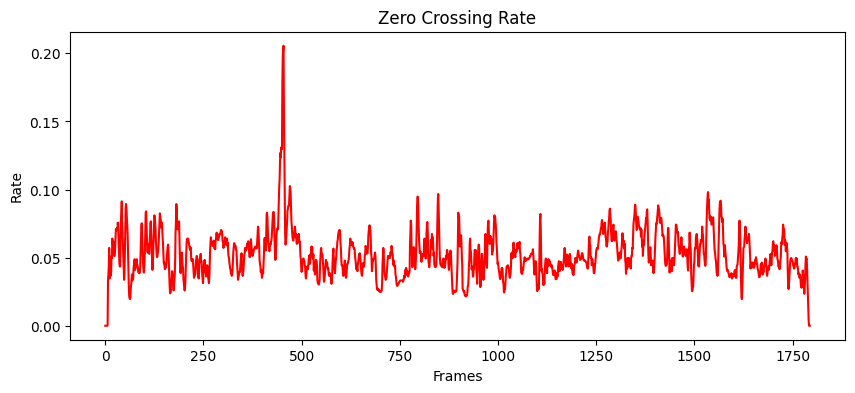

In [64]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Fayl yolunun təyin edilməsi
audio_path = "/content/mixkit-playground-with-kids-playing-2266.wav"

try:
    # Səs faylını yükləyin
    y, sr = librosa.load(audio_path, sr=None)

    # Səs siqnalının düzgün yüklənib-yüklənmədiyini yoxlayın
    if not isinstance(y, np.ndarray):
        raise TypeError("Audio data must be of type numpy.ndarray")
    if len(y) == 0:
        raise ValueError("Audio signal is empty!")

    # Zero Crossing Rate (ZCR) xüsusiyyətini hesablayın
    zcr = librosa.feature.zero_crossing_rate(y)

    # Nəticələri vizuallaşdırın
    plt.figure(figsize=(10, 4))
    plt.plot(zcr[0], color='r')
    plt.title('Zero Crossing Rate')
    plt.xlabel('Frames')
    plt.ylabel('Rate')
    plt.show()

except Exception as e:
    print(f"Error: {e}")


Spectral_roll_off


<function matplotlib.pyplot.show(close=None, block=None)>

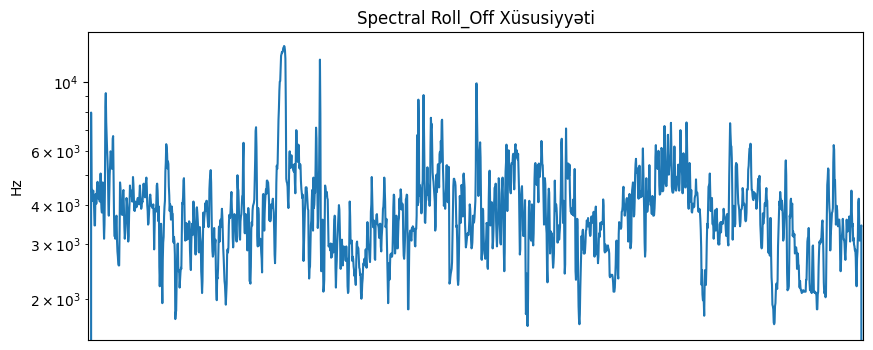

In [65]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
plt.figure(figsize=(10, 4))
plt.semilogy(spectral_rolloff.T, label='Spektral Roll_Off')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_rolloff.shape[-1]])
plt.title("Spectral Roll_Off Xüsusiyyəti")
plt.show

CHROMA Xüsusiyyətləri

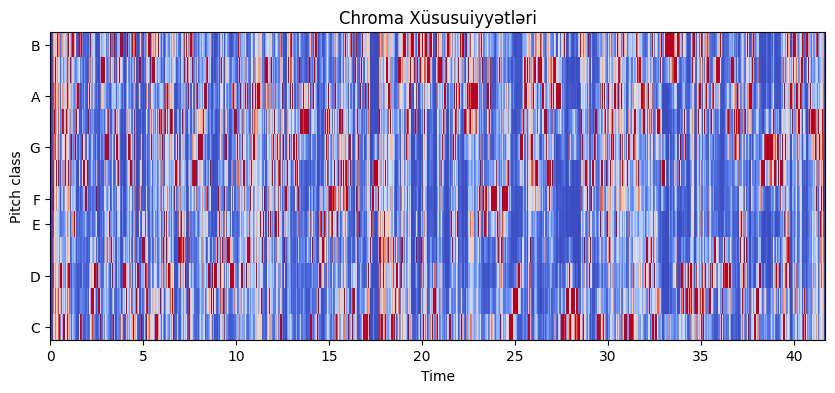

In [66]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar
plt.title('Chroma Xüsusuiyyətləri')
plt.show()

RMS Enerji Xüsusiyyətləri

<function matplotlib.pyplot.show(close=None, block=None)>

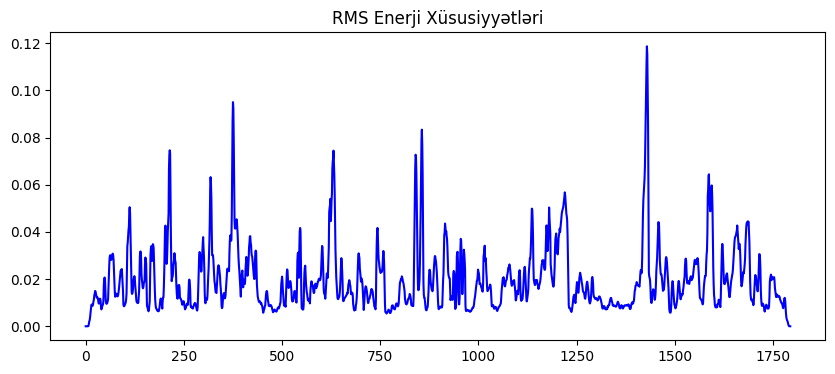

In [67]:
rms = librosa.feature.rms(y=y)
plt.figure(figsize=(10, 4))
plt.plot(rms[0], label='RMS Xüsusiyyətləri', color='b')
plt.title('RMS Enerji Xüsusiyyətləri')
plt.show